In [57]:
import csv
import datetime
import numpy as np
import pandas as pd
import xgboost as xgb

In [58]:
categories_dict = {'ind_empleado'  : {'MISS':0, 'N':1, 'B':2, 'F':3, 'A':4, 'S':5},
'sexo'          : {'V':0, 'H':1, 'MISS':2},
'ind_nuevo'     : {'0':0, '1':1, 'MISS':1},
'indrel'        : {'1':0, '99':1, 'MISS':1},
'indrel_1mes'   : {'MISS':0, '1.0':1, '1':1, '2.0':2, '2':2, '3.0':3, '3':3, '4.0':4, '4':4, 'P':5},
'tiprel_1mes'   : {'MISS':0, 'I':1, 'A':2, 'P':3, 'R':4, 'N':5},
'indresi'       : {'MISS':0, 'S':1, 'N':2},
'indext'        : {'MISS':0, 'S':1, 'N':2},
'indfall'       : {'MISS':0, 'S':1, 'N':2},
'tipodom'       : {'MISS':0, '1':1},
'ind_actividad_cliente' : {'0':0, '1':1, 'MISS':2},
'segmento'      : {'02 - PARTICULARES':0, '03 - UNIVERSITARIO':1, '01 - TOP':2, 'MISS':3},
'pais_residencia' : {'LV': 102, 'BE': 12, 'BG': 50, 'BA': 61, 'BM': 117, 'BO': 62, 'JP': 82, 'JM': 116, 'BR': 17,
                     'BY': 64, 'BZ': 113, 'RU': 43, 'RS': 89, 'RO': 41, 'GW': 99, 'GT': 44, 'GR': 39, 'GQ': 73,
                     'GE': 78, 'GB': 9, 'GA': 45, 'GN': 98, 'GM': 110, 'GI': 96, 'GH': 88, 'OM': 100, 'HR': 67, 
                     'HU': 106, 'HK': 34, 'HN': 22, 'AD': 35, 'PR': 40, 'PT': 26, 'PY': 51, 'PA': 60, 'PE': 20, 
                     'PK': 84, 'PH': 91, 'PL': 30, 'EE': 52, 'EG': 74, 'ZA': 75, 'EC': 19, 'AL': 25, 'VN': 90, 
                     'ET': 54, 'ZW': 114, 'ES': 0, 'MD': 68, 'UY': 77, 'MM': 94, 'ML': 104, 'US': 15, 'MT': 118, 
                     'MR': 48, 'UA': 49, 'MX': 16, 'IL': 42, 'FR': 8, 'MA': 38, 'FI': 23, 'NI': 33, 'NL': 7, 
                     'NO': 46, 'NG': 83, 'NZ': 93, 'CI': 57, 'CH': 3, 'CO': 21, 'CN': 28, 'CM': 55, 'CL': 4, 
                     'CA': 2, 'CG': 101, 'CF': 109, 'CD': 112, 'CZ': 36, 'CR': 32, 'CU': 72, 'KE': 65, 'KH': 95,
                     'SV': 53, 'SK': 69, 'KR': 87, 'KW': 92, 'SN': 47, 'SL': 97, 'KZ': 111, 'SA': 56, 'SG': 66,
                     'SE': 24, 'DO': 11, 'DJ': 115, 'DK': 76, 'DE': 10, 'DZ': 80, 'MK': 105, 'MISS': 1, 'LB': 81,
                     'TW': 29, 'TR': 70, 'TN': 85, 'LT': 103, 'LU': 59, 'TH': 79, 'TG': 86, 'LY': 108, 'AE': 37,
                     'VE': 14, 'IS': 107, 'IT': 18, 'AO': 71, 'AR': 13, 'AU': 63, 'AT': 6, 'IN': 31, 'IE': 5,
                     'QA': 58, 'MZ': 27},
'canal_entrada' : {'013': 49, 'KHP': 160, 'KHQ': 157, 'KHR': 161, 'KHS': 162, 'KHK': 10, 'KHL': 0, 'KHM': 12, 
                   'KHN': 21, 'KHO': 13, 'KHA': 22, 'KHC': 9, 'KHD': 2, 'KHE': 1, 'KHF': 19, '025': 159, 'KAC': 57, 
                   'KAB': 28, 'KAA': 39, 'KAG': 26, 'KAF': 23, 'KAE': 30, 'KAD': 16, 'KAK': 51, 'KAJ': 41, 
                   'KAI': 35, 'KAH': 31, 'KAO': 94, 'KAN': 110, 'KAM': 107, 'KAL': 74, 'KAS': 70, 'KAR': 32, 
                   'KAQ': 37, 'KAP': 46, 'KAW': 76, 'KAV': 139, 'KAU': 142, 'KAT': 5, 'KAZ': 7, 'KAY': 54, 
                   'KBJ': 133, 'KBH': 90, 'KBN': 122, 'KBO': 64, 'KBL': 88, 'KBM': 135, 'KBB': 131, 'KBF': 102, 
                   'KBG': 17, 'KBD': 109, 'KBE': 119, 'KBZ': 67, 'KBX': 116, 'KBY': 111, 'KBR': 101, 'KBS': 118,
                   'KBP': 121, 'KBQ': 62, 'KBV': 100, 'KBW': 114, 'KBU': 55, 'KCE': 86, 'KCD': 85, 'KCG': 59,
                   'KCF': 105, 'KCA': 73, 'KCC': 29, 'KCB': 78, 'KCM': 82, 'KCL': 53, 'KCO': 104, 'KCN': 81, 
                   'KCI': 65, 'KCH': 84, 'KCK': 52, 'KCJ': 156, 'KCU': 115, 'KCT': 112, 'KCV': 106, 'KCQ': 154, 
                   'KCP': 129, 'KCS': 77, 'KCR': 153, 'KCX': 120, 'RED': 8, 'KDL': 158, 'KDM': 130, 'KDN': 151,
                   'KDO': 60, 'KDH': 14, 'KDI': 150, 'KDD': 113, 'KDE': 47, 'KDF': 127, 'KDG': 126, 'KDA': 63, 
                   'KDB': 117, 'KDC': 75, 'KDX': 69, 'KDY': 61, 'KDZ': 99, 'KDT': 58, 'KDU': 79, 'KDV': 91, 
                   'KDW': 132, 'KDP': 103, 'KDQ': 80, 'KDR': 56, 'KDS': 124, 'K00': 50, 'KEO': 96, 'KEN': 137, 
                   'KEM': 155, 'KEL': 125, 'KEK': 145, 'KEJ': 95, 'KEI': 97, 'KEH': 15, 'KEG': 136, 'KEF': 128, 
                   'KEE': 152, 'KED': 143, 'KEC': 66, 'KEB': 123, 'KEA': 89, 'KEZ': 108, 'KEY': 93, 'KEW': 98, 
                   'KEV': 87, 'KEU': 72, 'KES': 68, 'KEQ': 138, 'MISS': 6, 'KFV': 48, 'KFT': 92, 'KFU': 36, 
                   'KFR': 144, 'KFS': 38, 'KFP': 40, 'KFF': 45, 'KFG': 27, 'KFD': 25, 'KFE': 148, 'KFB': 146, 
                   'KFC': 4, 'KFA': 3, 'KFN': 42, 'KFL': 34, 'KFM': 141, 'KFJ': 33, 'KFK': 20, 'KFH': 140, 
                   'KFI': 134, '007': 71, '004': 83, 'KGU': 149, 'KGW': 147, 'KGV': 43, 'KGY': 44, 'KGX': 24,
                   'KGC': 18, 'KGN': 11}
}

In [59]:
category_features = list(categories_dict.keys())

In [60]:
renta_dict = {'ALBACETE': 76895,  'ALICANTE': 60562,  'ALMERIA': 77815,  'ASTURIAS': 83995,  'AVILA': 78525,  'BADAJOZ': 60155,  'BALEARS, ILLES': 114223,  'BARCELONA': 135149,  'BURGOS': 87410, 'NAVARRA' : 101850,
'CACERES': 78691,  'CADIZ': 75397,  'CANTABRIA': 87142,  'CASTELLON': 70359,  'CEUTA': 333283, 'CIUDAD REAL': 61962,  'CORDOBA': 63260,  'CORUÑA, A': 103567,  'CUENCA': 70751,  'GIRONA': 100208,  'GRANADA': 80489,
'GUADALAJARA': 100635,  'HUELVA': 75534,  'HUESCA': 80324,  'JAEN': 67016,  'LEON': 76339,  'LERIDA': 59191,  'LUGO': 68219,  'MADRID': 141381,  'MALAGA': 89534,  'MELILLA': 116469, 'GIPUZKOA': 101850,
'MURCIA': 68713,  'OURENSE': 78776,  'PALENCIA': 90843,  'PALMAS, LAS': 78168,  'PONTEVEDRA': 94328,  'RIOJA, LA': 91545,  'SALAMANCA': 88738,  'SANTA CRUZ DE TENERIFE': 83383, 'ALAVA': 101850, 'BIZKAIA' : 101850,
'SEGOVIA': 81287,  'SEVILLA': 94814,  'SORIA': 71615,  'TARRAGONA': 81330,  'TERUEL': 64053,  'TOLEDO': 65242,  'UNKNOWN': 103689,  'VALENCIA': 73463,  'VALLADOLID': 92032,  'ZAMORA': 73727,  'ZARAGOZA': 98827}

products = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
products = products[2:]

In [61]:
def Process_products(row):
    tlist = []
    for col in products:
        if row[col].strip() in ['', 'NA']:
            target = 0
        else:
            target = int(float(row[col]))
        tlist.append(target)
    return tlist

def Process_Index(row, col):
    val = row[col].strip()
    if val not in ['','NA']:
        ind = categories_dict[col][val]
    else:
        ind = categories_dict[col]['MISS']
    return ind

def Process_Age(row):
    mean_age = 40.
    min_age = 18.
    max_age = 100.
    range_age = max_age - min_age
    age = row['age'].strip()
    if age == 'NA' or age == '':
        age = mean_age
    else:
        age = float(age)
        if age < min_age:
            age = min_age
        elif age > max_age:
            age = max_age
    return round( (age - min_age) / range_age, 4)

def Process_Seniority(row):
    min_value = 0.
    max_value = 256.
    range_value = max_value - min_value
    missing_value = 0.
    cust_seniority = row['antiguedad'].strip()
    if cust_seniority == 'NA' or cust_seniority == '':
        cust_seniority = missing_value
    else:
        cust_seniority = float(cust_seniority)
        if cust_seniority < min_value:
            cust_seniority = min_value
        elif cust_seniority > max_value:
            cust_seniority = max_value
    return round((cust_seniority-min_value) / range_value, 4)

def Process_Renta(row):
    min_value = 0.
    max_value = 1500000.
    range_value = max_value - min_value
    rent = row['renta'].strip()
    if rent == 'NA' or rent == '':
        if row['nomprov'] == 'NA' or row['nomprov'] == '':
            rent = float(renta_dict['UNKNOWN'])
        else:
            rent = float(renta_dict[row['nomprov']])
    else:
        rent = float(rent)
        if rent < min_value:
            rent = min_value
        elif rent > max_value:
            rent = max_value

    return round((rent-min_value) / range_value, 6)

def getMonth(row):
    return int(row['fecha_dato'].split('-')[1])

In [62]:
def DataPreprocessing(in_file_name, cust_dict, lag_cust_dict1, lag_cust_dict2, lag_cust_dict3, lag_cust_dict4):
    x_vars_list = []
    y_vars_list = []
    
    for row in csv.DictReader(in_file_name):
        if row['fecha_dato'] not in ['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28', '2016-06-28']:
            continue

        cust_id = int(row['ncodpers'])
        
        if (row['fecha_dato'] in ['2015-01-28', '2016-01-28'] ):
            target_list = Process_products(row)
            lag_cust_dict1[cust_id] =  target_list[:]
            continue
            
        if (row['fecha_dato'] in ['2015-02-28', '2016-02-28'] ):
            target_list = Process_products(row)
            lag_cust_dict2[cust_id] =  target_list[:]
            continue
            
        if (row['fecha_dato'] in ['2015-03-28', '2016-03-28'] ):
            target_list = Process_products(row)
            lag_cust_dict3[cust_id] =  target_list[:]
            continue
            
        if (row['fecha_dato'] in ['2015-04-28', '2016-04-28'] ):
            target_list = Process_products(row)
            lag_cust_dict4[cust_id] =  target_list[:]
            continue
        
        if (row['fecha_dato'] in ['2015-05-28', '2016-05-28'] ):
            target_list = Process_products(row)
            cust_dict[cust_id] =  target_list[:]
            continue
        
        x_vars = []
        for col in category_features:
            x_vars.append( Process_Index(row, col) )
        sex = Process_Index(row, 'sexo')
        age = Process_Age(row)
        x_vars.append(age)
        x_vars.append( getMonth(row))
        x_vars.append(Process_Seniority(row))
        income = Process_Renta(row)
        x_vars.append(income)
        if row['fecha_dato'] == '2016-06-28':
            prev_target_list = cust_dict.get(cust_id, [0]*22)
            lag_target_list1 = lag_cust_dict1.get(cust_id, [0]*22)
            lag_target_list2 = lag_cust_dict2.get(cust_id, [0]*22)
            lag_target_list3 = lag_cust_dict3.get(cust_id, [0]*22)
            lag_target_list4 = lag_cust_dict4.get(cust_id, [0]*22)
            x_vars_list.append(x_vars + prev_target_list + lag_target_list1+lag_target_list2 + lag_target_list3 + lag_target_list4)
        elif row['fecha_dato'] == '2015-06-28':
            prev_target_list = cust_dict.get(cust_id, [0]*22)
            lag_target_list1 = lag_cust_dict1.get(cust_id, [0]*22)
            lag_target_list2 = lag_cust_dict2.get(cust_id, [0]*22)
            lag_target_list3 = lag_cust_dict3.get(cust_id, [0]*22)
            lag_target_list4 = lag_cust_dict4.get(cust_id, [0]*22)
            target_list = Process_products(row)
            new_products = [max(x1 - x2,0) for (x1, x2) in zip(target_list, prev_target_list)]
            if sum(new_products) > 0:
                for ind, prod in enumerate(new_products):
                    if prod>0:
                        assert len(prev_target_list) == 22
                        x_vars_list.append(x_vars+prev_target_list+lag_target_list1+lag_target_list2+lag_target_list3+lag_target_list4)
                        y_vars_list.append(ind)
        
        
    return x_vars_list, y_vars_list, cust_dict, lag_cust_dict1, lag_cust_dict2, lag_cust_dict3, lag_cust_dict4

In [63]:
def runXGB(train_X, train_y, seed_val=27):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.05
    param['max_depth'] = 8
    param['silent'] = 0
    param['num_class'] = 22
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 14
    param['subsample'] = 0.8
    param['colsample_bytree'] = 0.8
    param['seed'] = seed_val
    num_rounds = 50

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    model = xgb.train(plst, xgtrain, num_rounds)
    return model

In [40]:
import zipfile


In [48]:
with zipfile.ZipFile('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip','r') as zip_ref:
    zip_ref.extractall('/kaggle/working/')


In [49]:
with zipfile.ZipFile('/kaggle/input/santander-product-recommendation/test_ver2.csv.zip','r') as zip_ref:
    zip_ref.extractall('/kaggle/working/')


In [75]:
    start_time = datetime.datetime.now()
    
    data_path = "/kaggle/input/santander-product-recommendation/"
    # Opening the training file
    
    train_file = open('/kaggle/working/train_ver2.csv')
    #train_file = open(data_path + "train_ver2.csv", encoding='utf-8', errors='replace')
    print('Starting file processing')

    # Perform data preprocessing on the training file
    x_vars_list, y_vars_list, cust_dict, lag_cust_dict1, lag_cust_dict2, lag_cust_dict3, lag_cust_dict4 = DataPreprocessing(train_file, {}, {}, {}, {}, {} )
    print('Finished file processing')

    # Convert data to NumPy arrays
    train_X = np.array(x_vars_list)
    train_y = np.array(y_vars_list)

    del x_vars_list, y_vars_list
    train_file.close()
    print(train_X.shape, train_y.shape)
    print(datetime.datetime.now() - start_time)

Starting file processing
Finished file processing
(45679, 128) (45679,)
0:04:09.235517


In [76]:
train_X.shape

(45679, 128)

In [68]:
    test_file= open('/kaggle/working/test_ver2.csv')
    
    # Perform data preprocessing on the test file
    x_vars_list, y_vars_list, cust_dict, _, _, _, _ = DataPreprocessing(
        test_file, cust_dict, lag_cust_dict1, lag_cust_dict2, lag_cust_dict3, lag_cust_dict4
    )
    test_X = np.array(x_vars_list)
    del x_vars_list
    test_file.close()
    print(test_X.shape)

(929615, 128)


In [ ]:
train_X = np.array(x_vars_list)
train_y = np.array(y_vars_list)

In [79]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)
model = runXGB(train_X, train_y, seed_val=0)

[01:30:32] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [81]:
xgtest = xgb.DMatrix(X_test)
preds = model.predict(xgtest)

In [91]:
preds[1]


array([0.7591923 , 0.00730945, 0.01556344, 0.00766682, 0.0276057 ,
       0.00746823, 0.00729099, 0.03011382, 0.00730419, 0.01466986,
       0.00986284, 0.00776008, 0.00726713, 0.00739586, 0.00728688,
       0.00860601, 0.00835299, 0.00772249, 0.0072485 , 0.01434236,
       0.01252548, 0.01744463], dtype=float32)

In [93]:
recommended_product = np.argmax(preds, axis=1)

In [95]:
recommended_product

array([20,  0, 19, ..., 15, 19, 21])

In [94]:
y_test

array([20,  0, 19, ..., 15, 19, 20])

In [96]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, recommended_product)
print("Accuracy:", accuracy)

Accuracy: 0.6580560420315237


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6580560420315237
Precision: 0.6419955986099114
Recall: 0.6580560420315237
F1 Score: 0.6315384428903055


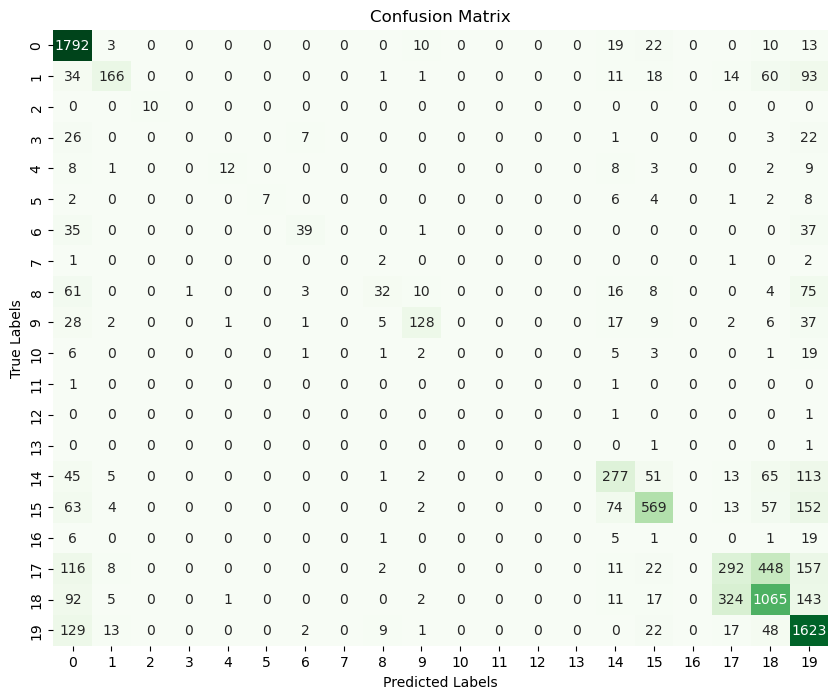

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_test, recommended_product)
precision = precision_score(y_test, recommended_product, average='weighted')
recall = recall_score(y_test, recommended_product, average='weighted')
f1 = f1_score(y_test, recommended_product, average='weighted')
confusion = confusion_matrix(y_test, recommended_product)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, cmap=plt.cm.Greens, fmt='d', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
